<a href="https://colab.research.google.com/github/Haooo517/Generation_AI/blob/main/NTNU_41147006S_%E8%B3%87%E5%B7%A5115_%E5%BC%B5%E8%A8%93%E8%B1%AA_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 實作機器人的 RAG 系統

首先引入老師的基本四件套

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

接著安裝這次會用到的 packages <br>
包括聊天機器人需要的 OpenAI <br>
還有能夠生成 Web APP 介面的 gradio

In [2]:
!pip install openai gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


然後是用 wget 去下載這次要用到的 faiss_db.zip <br>
內容是由我自己設定的 <br>
至於是什麼呢？等等就知道了

In [3]:
!wget -O faiss_db.zip 'https://drive.google.com/uc?export=download&id=1VnETr7BFOgsLfmMs5AUj9aSbK9FsA7yM'
!unzip faiss_db.zip

--2025-04-21 16:18:57--  https://drive.google.com/uc?export=download&id=1VnETr7BFOgsLfmMs5AUj9aSbK9FsA7yM
Resolving drive.google.com (drive.google.com)... 74.125.26.102, 74.125.26.138, 74.125.26.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1VnETr7BFOgsLfmMs5AUj9aSbK9FsA7yM&export=download [following]
--2025-04-21 16:18:57--  https://drive.usercontent.google.com/download?id=1VnETr7BFOgsLfmMs5AUj9aSbK9FsA7yM&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6598 (6.4K) [application/octet-stream]
Saving to: ‘faiss_db.zip’

faiss_db.zip        100%[===================>]   6.44K  --.-KB/s    in 0s

再來下載這次會要用到的套件

In [4]:
!pip install -U langchain langchain-community sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

之後就到了寫程式時間！ <br>
先把剛剛下載好的 packages 都 import 進來 <br>
還有用來存取 API key 的 userdata

In [5]:
from openai import OpenAI
from google.colab import userdata
import gradio as gr
import os

這次還要再多 import 一些新下載的 faiss 資料庫相關的 packages

In [6]:
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain

接著設定 E5 embedding 格式

In [7]:
class CustomE5Embedding(HuggingFaceEmbeddings):
    def embed_documents(self, texts):
        texts = [f"passage: {t}" for t in texts]
        return super().embed_documents(texts)

    def embed_query(self, text):
        return super().embed_query(f"query: {text}")

之後把 faiss_db 的資料匯入進來 <br>
並套用剛剛設定的 embedding

In [8]:
embedding_model = CustomE5Embedding(model_name="intfloat/multilingual-e5-small")
db = FAISS.load_local("faiss_db", embedding_model, allow_dangerous_deserialization=True)
retriever = db.as_retriever()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/498k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

再來設定 API key <br>
這次使用 Groq 的 llama3 模型實作看看 <br>
將 API key 存到 Colab 的設定裡 <br>
就可以用 userdata 拿出來了

In [9]:
api_key = userdata.get("Groq")
os.environ["OPENAI_API_KEY"] = api_key

base_url = "https://api.groq.com/openai/v1"
model = "llama3-70b-8192"

client = OpenAI(
    base_url=base_url,
)

這個部分就很重要了 <br>
為了做出能持續對話的機器人 <br>
這裡需要使用一個陣列紀錄對話歷史

In [10]:
chat_history = []

由於這次我提供的資料庫是許多經典中文歌曲的介紹 <br>
因此這次的機器人設定為：「中華小曲庫」！ <br>
會根據使用者的輸入來推薦歌曲 <br>

In [11]:
title = "中華小曲庫"

system_prompt = '''
你是「中華小曲庫」，一位專門推薦中國經典歌曲和熱門曲目的智慧音樂系統。
你的職責是根據使用者的要求，推薦適合的歌曲，並提供歌曲的簡介、歌詞節錄、發行時間等資訊。
你能根據不同的情境推薦合適的歌曲，無論是情感豐富的情歌，還是激勵人心的勵志歌曲。
嚴格使用繁體中文回應，並確保提供的歌曲資訊清晰且有趣。
'''

prompt_template = """
根據下列資料回答問題：
{retrieved_chunks}

使用者的問題是：{question}

嚴格使用繁體中文回應。
你是「中華小曲庫」，一位音樂推薦系統，專門幫助使用者挑選和推薦歌曲。
根據使用者的要求，請提供最合適的歌曲推薦，並附上以下資訊：
1. 歌曲的簡介：簡短介紹歌曲的風格和背景。
2. 歌詞節錄：提供歌曲的代表性歌詞片段。
3. 發行時間：歌曲的發行年份。
4. 歌曲總長：歌曲的總長度。
5. 若有需要，還可以推薦相似的歌曲。

若資料不足以推薦出適合的歌曲，請告訴使用者再等一段時間再來詢問看看有沒有新的推薦。
"""

再來就把這些參數丟到函式裡設定好

In [12]:
def chat_with_omega(user_input):
    global chat_history
    docs = retriever.get_relevant_documents(user_input)
    retrieved_chunks = "\n\n".join([doc.page_content for doc in docs])

    final_prompt = prompt_template.format(retrieved_chunks=retrieved_chunks, question=user_input)

    response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": final_prompt},
    ]
    )
    answer = response.choices[0].message.content

    chat_history.append((user_input, answer))
    return answer

接著把 gradio 也給設定好 <br>
就可以打開來測試看看了！

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("## 中華小曲庫 Karaoke！")
    gr.Markdown("歡迎來到經典中文歌曲的世界，在這裡可以點到任何的歌曲！")

    chatbot = gr.Chatbot(label="點歌中...", type="messages")
    msg = gr.Textbox(placeholder="請輸入你的問題...", label="你的問題")

    def respond(message, chat_log):
        response = chat_with_omega(message)
        chat_log.append({"role": "user", "content": message})
        chat_log.append({"role": "assistant", "content": response})
        return "", chat_log

    msg.submit(respond, [msg, chatbot], [msg, chatbot])

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1c983feb40c36eb605.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


最後的使用結果大致如下

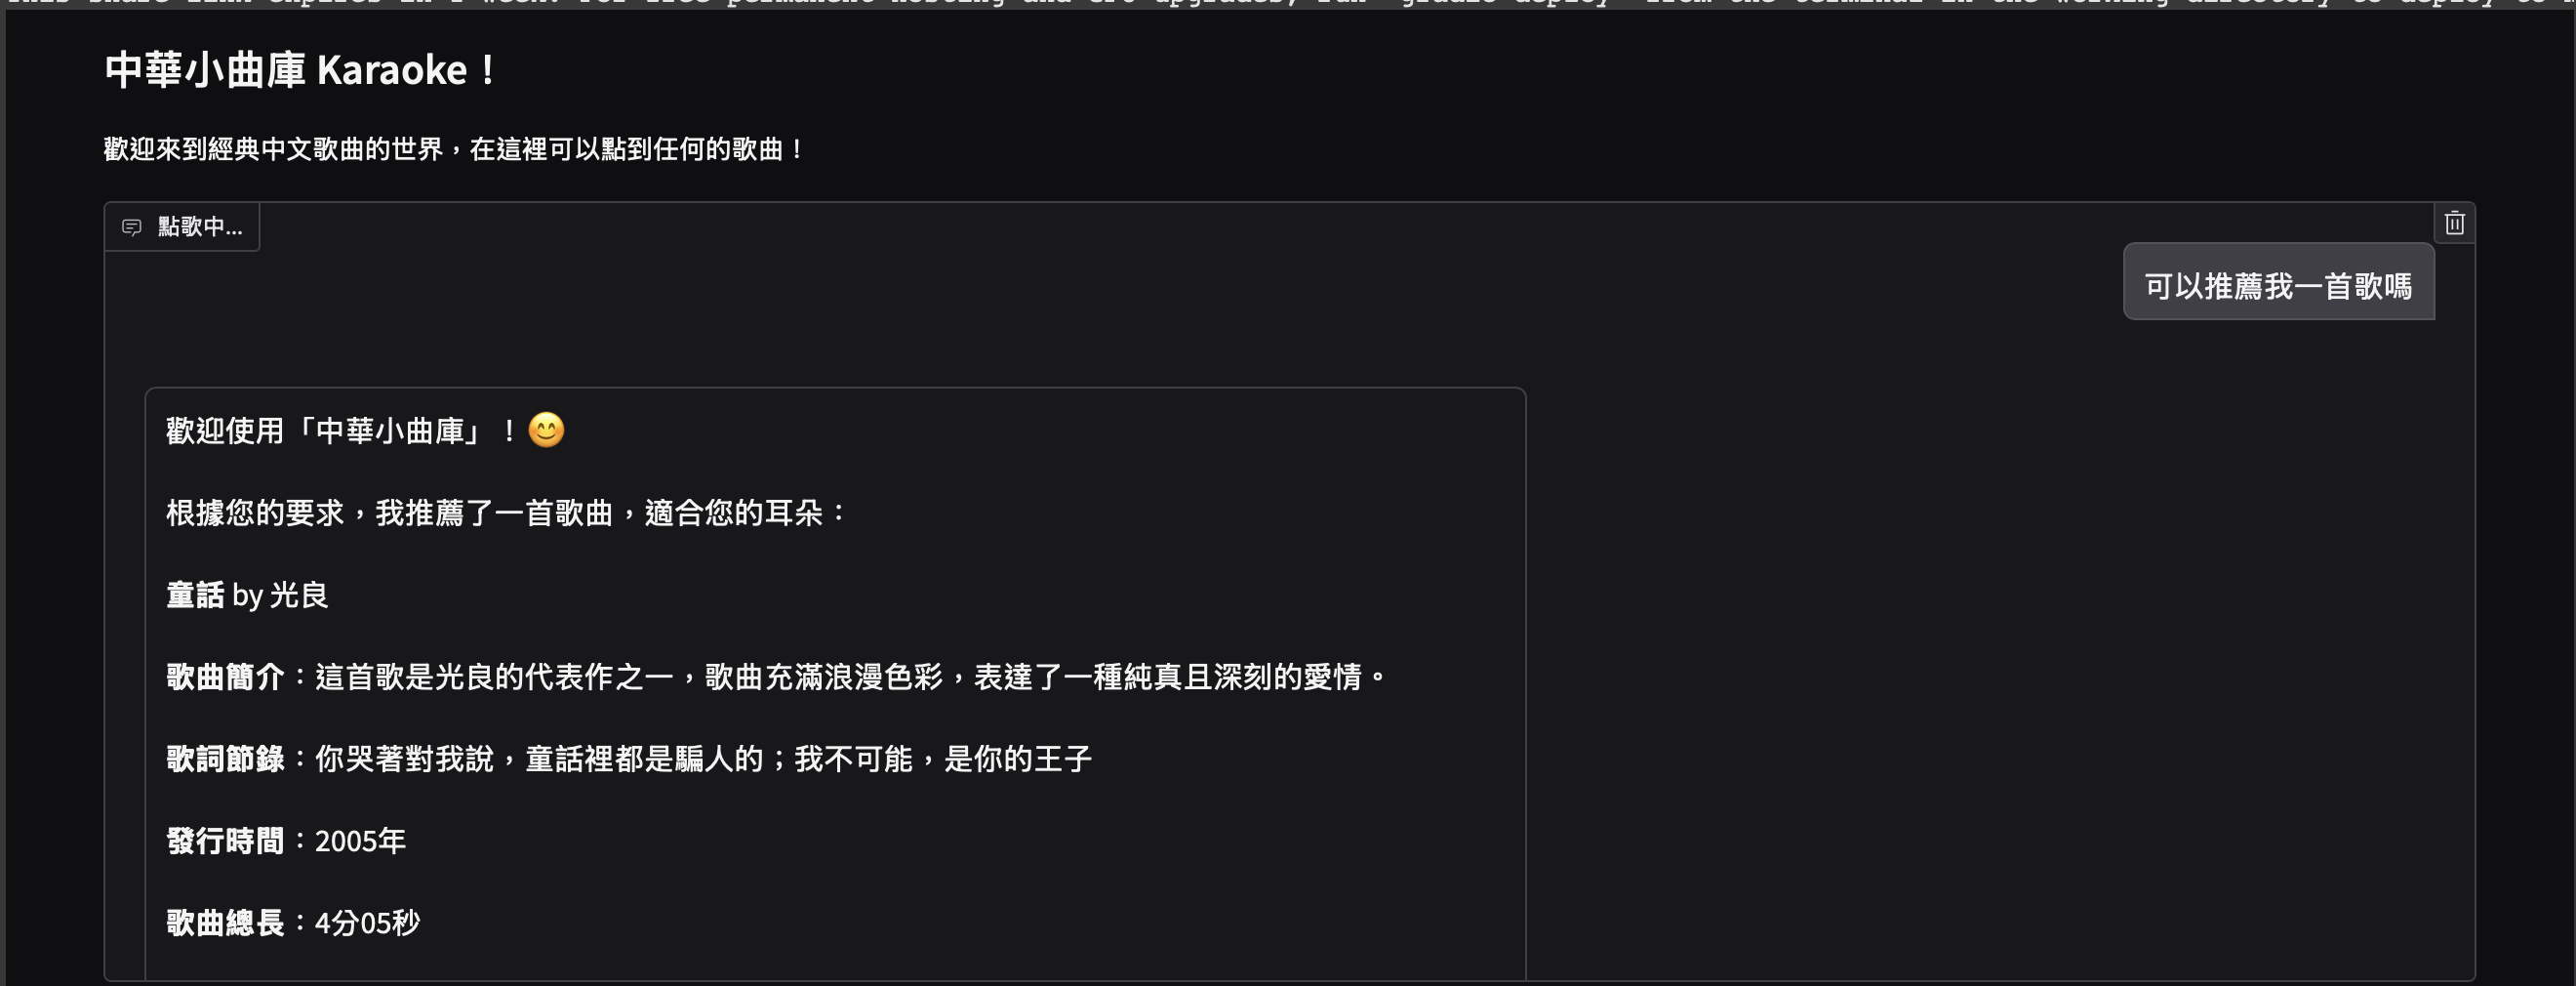

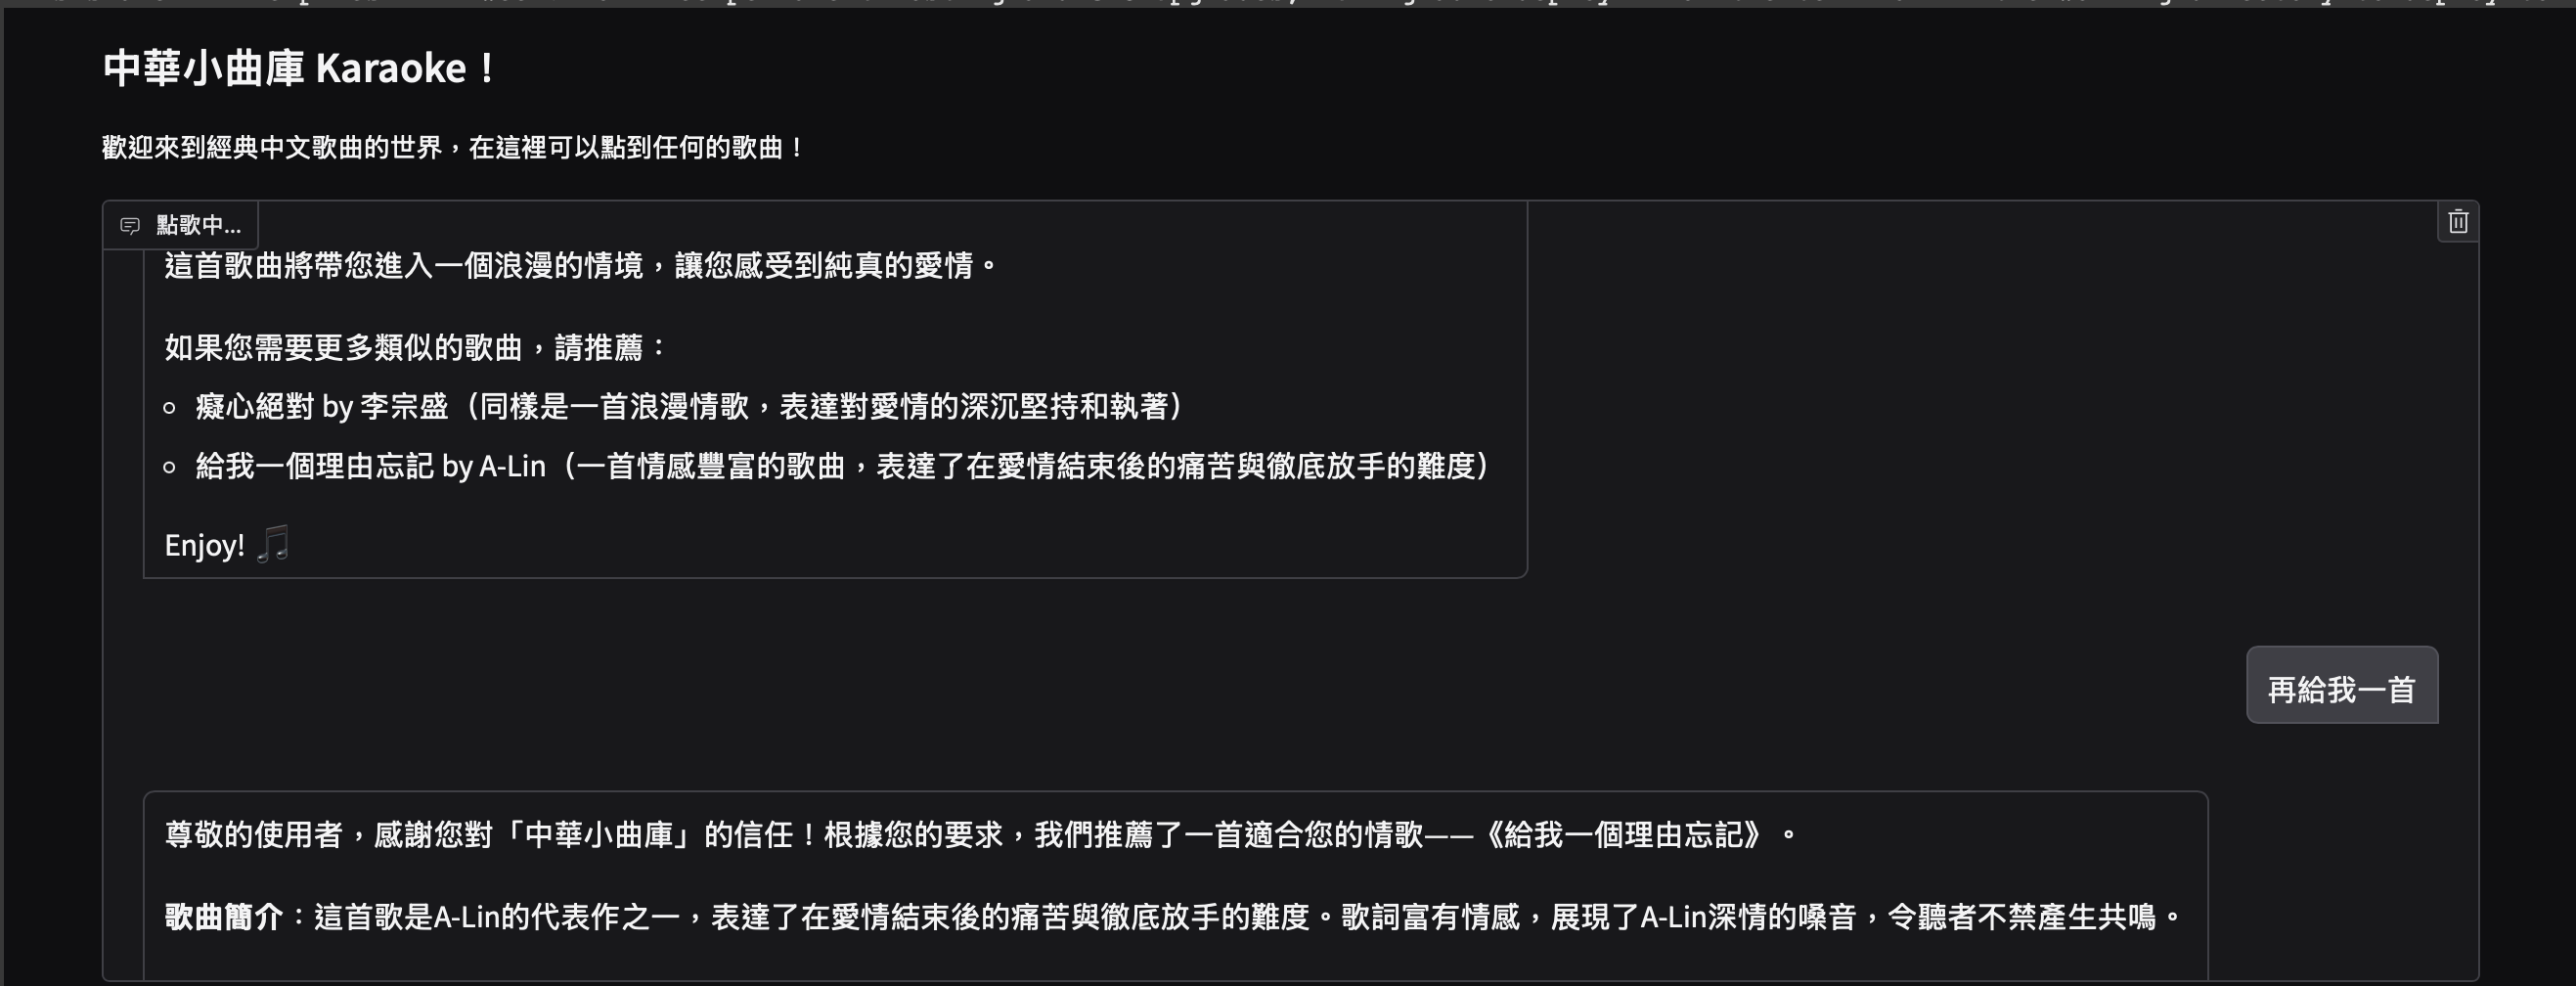

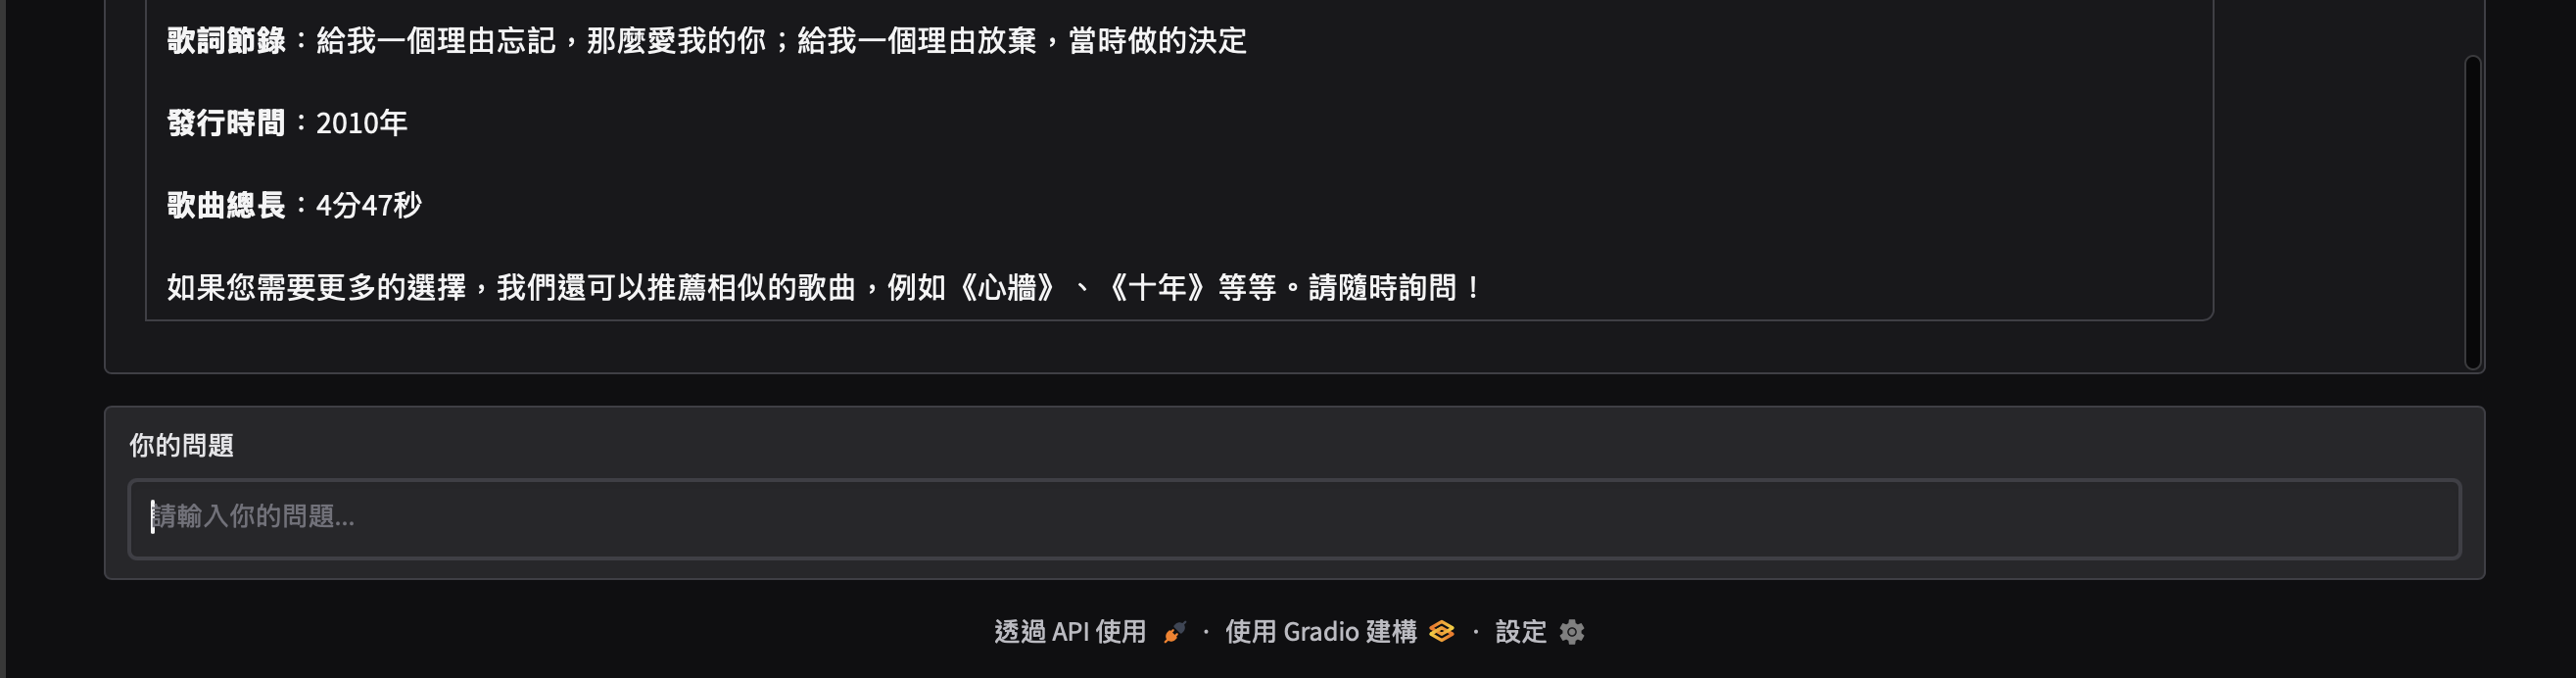

可以看到他有成功推薦資料庫中的歌曲 <br>
雖然為了作業方便所以歌曲我只放了幾首 <br>
但他的確是有在良好運作的 <br>
代表如果未來要加更多歌應該也是輕輕鬆鬆